In [166]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import librosa as lr
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,GRU,LSTM,Dropout
from tensorflow.keras import Model,Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from sklearn.utils import class_weight
from sklearn import preprocessing
from sklearn.utils import shuffle
from tensorflow.keras.utils import plot_model
from glob import glob
from keras.models import load_model

In [2]:
debug=True
seq_len=200

In [52]:
path='E:/GRU_MODEL/'
with h5py.File(path+'train_data.hdf5','r') as hf:
    english_data=hf['english_data'][:]
    english_label = hf['english_label'][:]
    armania_data = hf['armania_data'][:]
    armania_label = hf['armania_label'][:]
    tamil_english_data = hf['tamil_english_data'][:]
    tamil_english_label = hf['tamil_english_label'][:]


In [53]:
xtrain_english,xval_english,ytrain_english,yval_english=train_test_split(english_data,english_label,test_size=0.2,shuffle=False)
xtrain_armania,xval_armania,ytrain_armania,yval_armania=train_test_split(armania_data,armania_label,test_size=0.2,shuffle=False)
xtrain_tamil_english,xval_tamil_english,ytrain_tamil_english,yval_tamil_english=train_test_split(tamil_english_data,tamil_english_label,test_size=0.2,shuffle=False)
print(xtrain_armania.shape)
print(xtrain_english.shape)
print(xtrain_tamil_english.shape)

(200, 200, 64)
(227, 200, 64)
(398, 200, 64)


In [57]:
x_train=np.concatenate((xtrain_armania,xtrain_english,xtrain_tamil_english),axis=0)
x_val=np.concatenate((xval_armania,xval_english,xval_tamil_english),axis=0)
y_train=np.concatenate((ytrain_armania,ytrain_english,ytrain_tamil_english),axis=0)
y_val=np.concatenate((yval_armania,yval_english,yval_tamil_english),axis=0)
print(y_train.shape)

(825, 200, 3)


In [58]:

x_train,y_train=shuffle(x_train,y_train)
x_val,y_val=shuffle(x_val,y_val)
print(y_val.shape)


(208, 200, 3)


In [28]:
'''if(debug):
    x_train=x_train[:int(0.1*len(x_train))]
    y_train=y_train[:int(0.1*len(y_train))]
    x_val=x_val[:int(0.1*len(x_val))]
    y_val=y_val[:int(0.1*len(y_val))]
    print(x_val.shape)
'''    

(20, 200, 3)


In [139]:
training_in=Input(batch_shape=(None,200,64))
#d1=Dense(16,activation='relu')(training_in)
block1=GRU(16,return_sequences=True,stateful=False)(training_in)
training_pred=Dense(3,activation='softmax')(block1)
training_model=Model(inputs=training_in,outputs=training_pred)
training_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [140]:
training_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 200, 64)]         0         
                                                                 
 gru_7 (GRU)                 (None, 200, 16)           3936      
                                                                 
 dense_5 (Dense)             (None, 200, 3)            51        
                                                                 
Total params: 3,987
Trainable params: 3,987
Non-trainable params: 0
_________________________________________________________________


In [141]:
results = training_model.fit(x_train, y_train, validation_data=(x_val, y_val),  batch_size=16, epochs=60, shuffle=True)

Epoch 1/60
52/52 [==============================] - 3s 39ms/step - loss: 1.0813 - accuracy: 0.5368 - val_loss: 0.8581 - val_accuracy: 0.5866
Epoch 2/60
52/52 [==============================] - 2s 34ms/step - loss: 0.7478 - accuracy: 0.6582 - val_loss: 0.6437 - val_accuracy: 0.7439
Epoch 3/60
52/52 [==============================] - 2s 35ms/step - loss: 0.5860 - accuracy: 0.7864 - val_loss: 0.5202 - val_accuracy: 0.8377
Epoch 4/60
52/52 [==============================] - 2s 34ms/step - loss: 0.4945 - accuracy: 0.8504 - val_loss: 0.4287 - val_accuracy: 0.9031
Epoch 5/60
52/52 [==============================] - 2s 35ms/step - loss: 0.4204 - accuracy: 0.8869 - val_loss: 0.3671 - val_accuracy: 0.9144
Epoch 6/60
52/52 [==============================] - 2s 35ms/step - loss: 0.3572 - accuracy: 0.9082 - val_loss: 0.3047 - val_accuracy: 0.9057
Epoch 7/60
52/52 [==============================] - 2s 34ms/step - loss: 0.3136 - accuracy: 0.9032 - val_loss: 0.2879 - val_accuracy: 0.9072
Epoch 8/60
52

Epoch 59/60
52/52 [==============================] - 2s 34ms/step - loss: 0.0509 - accuracy: 0.9845 - val_loss: 0.1756 - val_accuracy: 0.9471
Epoch 60/60
52/52 [==============================] - 2s 34ms/step - loss: 0.0481 - accuracy: 0.9841 - val_loss: 0.1709 - val_accuracy: 0.9459


In [101]:
streaming_in = Input(batch_shape=(1,None,64)) 
block1 = GRU(16, return_sequences=False, stateful=True )(streaming_in)
streaming_pred = Dense(3,activation='softmax')(block1)
streaming_model = Model(inputs=streaming_in, outputs=streaming_pred)
streaming_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
streaming_model.summary()




Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(1, None, 64)]           0         
                                                                 
 gru_3 (GRU)                 (1, 16)                   3936      
                                                                 
 dense_2 (Dense)             (1, 3)                    51        
                                                                 
Total params: 3,987
Trainable params: 3,987
Non-trainable params: 0
_________________________________________________________________


In [75]:
results2 = streaming_model.fit(x_train, y_train, validation_data=(x_val, y_val),  batch_size=16, epochs=60, shuffle=True)

Epoch 1/60
6/6 [==============================] - 2s 129ms/step - loss: 1.2005 - accuracy: 0.3544 - val_loss: 0.9337 - val_accuracy: 0.5750
Epoch 2/60
6/6 [==============================] - 0s 59ms/step - loss: 1.0493 - accuracy: 0.4562 - val_loss: 0.8579 - val_accuracy: 0.6378
Epoch 3/60
6/6 [==============================] - 0s 51ms/step - loss: 0.9491 - accuracy: 0.5537 - val_loss: 0.8013 - val_accuracy: 0.6480
Epoch 4/60
6/6 [==============================] - 0s 51ms/step - loss: 0.8758 - accuracy: 0.5855 - val_loss: 0.7595 - val_accuracy: 0.6572
Epoch 5/60
6/6 [==============================] - 0s 58ms/step - loss: 0.8283 - accuracy: 0.5996 - val_loss: 0.7335 - val_accuracy: 0.6635
Epoch 6/60
6/6 [==============================] - 0s 61ms/step - loss: 0.7990 - accuracy: 0.6112 - val_loss: 0.7080 - val_accuracy: 0.6690
Epoch 7/60
6/6 [==============================] - 0s 57ms/step - loss: 0.7750 - accuracy: 0.6171 - val_loss: 0.6800 - val_accuracy: 0.6760
Epoch 8/60
6/6 [==========

In [161]:
training_model.save('E:/GRU_MODEL/training_model.hdf5')
training_model.save_weights('E:/GRU_MODEL/weights.hd5', overwrite=True)

In [142]:
loss = results.history['loss']
val_loss = results.history['val_loss']
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']
x_train.shape

(825, 200, 64)

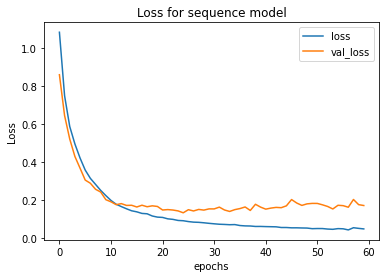

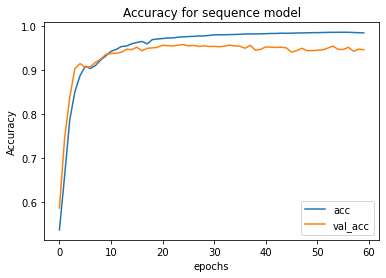

In [143]:
epochs = np.arange(len(loss))
plt.figure()
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Loss for sequence model')
plt.legend()
plt.savefig('E:/GRU_MODEL/sequence_model_loss.png', dpi=256)
plt.show()
plt.close()

plt.plot(epochs, accuracy, label='acc')
plt.plot(epochs, val_accuracy, label='val_acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy for sequence model')
plt.legend()
plt.savefig('E:/GRU_MODEL/sequence_model_acc.png', dpi=236)
plt.show()
plt.close()

In [145]:
x_test=[]
seq_len=200
path='E:/GRU_MODEL/data/test/'
i=0

In [171]:
file =glob(path+'*')[0]
data1, sr = lr.load(file, sr = 16000)
data1 = lr.feature.mfcc(y = data1, sr = sr, n_mfcc = 64,n_fft = int(sr * 0.010),hop_length = int(sr*0.010)).T
length = len(data1)
data1 = data1[:length - (length % seq_len)]
print(length)
data1 = data1.reshape(int(len(data1)/seq_len), seq_len, 64)
print(data1.shape)
data1=data1[:1,:,:]
print(data1.shape)
x_test.extend(data1)
i += 1
print('Number of files read: ',i)

1001
(5, 200, 64)
(1, 200, 64)
Number of files read:  2


In [172]:
print(np.shape(x_test))
history.predict(x_test)

(6, 200, 64)


ValueError: in user code:

    File "C:\Users\abi78\Anaconda3\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\abi78\Anaconda3\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\abi78\Anaconda3\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\abi78\Anaconda3\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\abi78\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\abi78\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 199, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "model_5" expects 1 input(s), but it received 6 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 64) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 64) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 64) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(None, 64) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(None, 64) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(None, 64) dtype=float32>]


In [169]:
history=load_model('E:/GRU_MODEL/training_model.hdf5')

In [103]:
for s in range(len(x_test)):
    in_seq = x_test[s].reshape( (1, seq_len, 64) )
    seq_pred = training_model.predict(in_seq)
    seq_pred = seq_pred.reshape(seq_len,3)
    for n in range(seq_len):
        in_feature_vector = x_test[s][n].reshape(1,1,64)
        single_pred = streaming_model.predict(in_feature_vector)[0]
        print(f'Seq-model Prediction, Streaming-Model Prediction: {seq_pred[n]}, {single_pred}')
    streaming_model.reset_states()

Seq-model Prediction, Streaming-Model Prediction: [0.10414401 0.63892287 0.25693312], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.07076654 0.41165745 0.51757604], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.07110706 0.4139519  0.51494104], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.09694308 0.6282466  0.2748103 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.08850711 0.54869413 0.36279878], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.15548927 0.33505175 0.50945896], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.1557829  0.33582243 0.5083947 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.07801907 0.14816368 0.7738173 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.04998684 0.44031847 0.5096947 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.06742109 0.62419546 0.30838338], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.05127208 0.4339547  0.51477325], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.05000217 0.4206595  0.52933836], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.07517153 0.7533719  0.17145655], [0.3048339  0.1332527  0.56191343]
Seq-model Prediction, Streaming-Model Prediction: [0.07704236 0.85469747 0.06826025], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.07671936 0.8547562  0.06852444], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.07678311 0.8547447  0.06847223], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.79365975 0.03770066 0.16863966], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.7927564  0.03763169 0.16961195], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.79086876 0.03747123 0.17166005], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.7901288  0.03741777 0.17245342], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.7901161  0.03742081 0.17246309], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.32097274 0.5429193  0.13610797], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.82640415 0.04051638 0.13307942], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8263752  0.04051371 0.13311118], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.10908464 0.07478659 0.81612873], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.09515602 0.10115097 0.80369294], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.13220415 0.08582564 0.78197026], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.1127998 0.0715702 0.81563  ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.11181708 0.07083564 0.81734735], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.12261412 0.07869336 0.79869246], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.12366363 0.0794648  0.79687154], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.12370411 0.07728755 0.79900837], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Mod

Seq-model Prediction, Streaming-Model Prediction: [0.10383139 0.3708388  0.5253298 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.1038273 0.370821  0.5253517], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.09183669 0.31925377 0.58890957], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.7618077  0.0880252  0.15016715], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.22666965 0.6499447  0.12338559], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.16343568 0.71263635 0.12392798], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.16994888 0.7029243  0.12712684], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.5584218  0.05242991 0.38914827], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Mod

Seq-model Prediction, Streaming-Model Prediction: [0.8758436  0.04592487 0.0782316 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8526102  0.04313391 0.104256  ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8526255  0.04313445 0.10424007], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8758388  0.04592424 0.07823702], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.29106626 0.6359832  0.0729505 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8732263  0.04557933 0.08119436], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.77123576 0.03604932 0.19271493], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8520109  0.04306981 0.10491923], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.29576674 0.29264644 0.41158688], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.02187828 0.88990974 0.08821194], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01831024 0.6216455  0.36004415], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.03083758 0.4798281  0.48933434], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01969833 0.5856477  0.39465395], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01971207 0.5852715  0.39501652], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01946044 0.58948106 0.39105842], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01955599 0.58660656 0.39383748], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.47662696 0.01885226 0.5045208 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47780085 0.01890926 0.50328994], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.17915675 0.29367256 0.52717066], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.19700004 0.2579346  0.54506534], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.17744218 0.295023   0.5275348 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.19345759 0.3405942  0.4659482 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.04110336 0.9428114  0.01608524], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01151744 0.9669795  0.02150304], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.1773658  0.29530412 0.52733004], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.1774411  0.29576927 0.5267896 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.17729326 0.29546583 0.52724093], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47957078 0.0190444  0.5013848 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.48077324 0.0191052  0.5001215 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.48063755 0.01909591 0.5002665 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.6291732  0.02683726 0.34398955], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8758303  0.04593552 0.07823424], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.25582784 0.1698633  0.57430893], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.20679869 0.12559584 0.6676055 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.20679949 0.12559566 0.66760486], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.20887479 0.12707254 0.66405267], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.20887485 0.12707248 0.66405267], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.43611458 0.32705322 0.23683225], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4331526  0.33387426 0.23297317], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.43885463 0.3262319  0.23491345], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.24105906 0.41785446 0.34108648], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4776886  0.01891659 0.5033948 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.52969515 0.02150437 0.44880044], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.86875    0.0450401  0.08620996], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.7586403  0.03507474 0.20628501], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.5861784  0.02471068 0.38911092], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.59044456 0.02491028 0.38464513], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.45821092 0.02865539 0.5131337 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.28329468 0.6454846  0.07122067], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.2761964  0.6543417  0.06946193], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01235906 0.9827313  0.00490965], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01017162 0.9858271  0.00400135], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.0133196  0.9835454  0.00313495], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00989647 0.9860255  0.00407805], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00989766 0.98601925 0.00408307], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.03111478 0.96746284 0.00142233], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.5131682  0.18093422 0.30589756], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.50689584 0.17747582 0.31562835], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.12182956 0.03240079 0.84576964], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.12025236 0.03192502 0.8478226 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.17587814 0.04926448 0.77485734], [0.3036291  0.13312173 0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.17705756 0.04729304 0.7756494 ], [0.3036291  0.13312173 0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.41132942 0.12836841 0.46030208], [0.3036291  0.13312173 0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.45414877 0.14564626 0.40020502], [0.3036291  0.13312173 0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.736896   0.03505794 0.22804607], [0.3036291  0.13312173 0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01087473 0.97367126 0.01545396], [0.3036291  0.13312173 0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01108241 0.9737872  0.01513043], [0.30703047 0.13674988 0.5562196 ]
Seq-model Prediction, Streaming-Model Prediction: [0.2513437  0.61650175 0.13215454], [0.3036291  0.13312173 0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.27546063 0.5851948  0.13934451], [0.3036291  0.13312173 0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.20965141 0.6715447  0.11880398], [0.3036291  0.13312173 0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.27441773 0.5865178  0.1390644 ], [0.3036291  0.13312173 0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.44150525 0.36088797 0.19760679], [0.3036291  0.13312173 0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.38106802 0.48819318 0.13073872], [0.3036291  0.13312173 0.5632492 ]
Seq-model Prediction, Streaming-Model Prediction: [0.16119689 0.71506256 0.12374046], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.16179578 0.71408635 0.12411787], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.16662014 0.7115388  0.1218411 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.16274898 0.7122932  0.12495781], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.16276401 0.7125055  0.12473045], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.16283792 0.7123835  0.12477861], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.16375142 0.71066374 0.12558492], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.1574487  0.512585   0.32996634], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01878485 0.8947301  0.08648504], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.26655576 0.29734597 0.43609825], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.24117528 0.338445   0.42037976], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.2678132  0.29479012 0.43739665], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.29372457 0.2438907  0.46238473], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.02484372 0.86537313 0.10978314], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.29327595 0.24452125 0.4622028 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.22325182 0.6589224  0.11782574], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.17967622 0.45466354 0.36566022], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.1796822  0.45468533 0.36563247], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.5602973  0.03373839 0.40596431], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.179628   0.45448995 0.36588204], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.29174656 0.60904676 0.09920675], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.35364938 0.60312545 0.04322517], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.28671756 0.6528     0.06048243], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.28245094 0.07244319 0.6451059 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.41983023 0.06000583 0.5201639 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.41936144 0.06026853 0.52037007], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.09598801 0.57091403 0.33309793], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4198336  0.06000444 0.520162  ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4198307  0.06000603 0.52016324], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4198336  0.06000444 0.520162  ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4198336  0.06000444 0.520162  ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.5010793  0.02005176 0.4788689 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47795573 0.01891675 0.5031276 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.48035648 0.01903352 0.50061   ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8601521  0.04397794 0.09586991], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8752115  0.04584081 0.07894764], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.87520945 0.04584025 0.07895036], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.52141255 0.02106959 0.45751783], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.5063328  0.02031291 0.47335425], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.18520582 0.31101558 0.5037787 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.19111264 0.2990778  0.5098096 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.37293223 0.07103905 0.5560288 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.17170067 0.3157106  0.5125887 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47250977 0.02067378 0.5068165 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47252885 0.02066942 0.5068017 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47273874 0.02067848 0.50658274], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4727668  0.02067844 0.5065548 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.5043026  0.03542881 0.46026856], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.5099369  0.02188786 0.46817517], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.50120693 0.02192316 0.47686997], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.5012102  0.02192076 0.4768691 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.5012081  0.02191633 0.4768755 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.49324384 0.02384189 0.48291427], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.50118566 0.02185819 0.47695613], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.50121325 0.02185711 0.47692963], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.8736914  0.04774776 0.07856087], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.87307525 0.04781215 0.07911264], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8728987  0.04763699 0.07946437], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8645314  0.04653809 0.08893053], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.5421906  0.02296596 0.43484348], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.87428135 0.04744185 0.07827678], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.75724185 0.14629082 0.09646729], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.7129298  0.18808602 0.09898414], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.8723745  0.04546897 0.08215653], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.87181216 0.04586961 0.0823182 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.87237275 0.04546968 0.08215752], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.87226844 0.04545514 0.0822765 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8719914  0.04541887 0.08258969], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.87199605 0.04541831 0.08258572], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8719404  0.04543025 0.08262938], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8639511  0.05120828 0.08484067], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.02601246 0.94361097 0.03037655], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.3068059  0.5378817  0.15531237], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.10353109 0.24189162 0.65457726], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.05240174 0.34916112 0.5984372 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.09043712 0.82157487 0.087988  ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.66343206 0.12968561 0.2068823 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.66343176 0.12968591 0.20688228], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.72727185 0.10596151 0.16676666], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.7149335  0.03582864 0.24923782], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.37761888 0.5284571  0.09392404], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.03735045 0.9566279  0.00602156], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01202943 0.9722445  0.0157261 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.08826353 0.8126179  0.09911868], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.09697708 0.79574263 0.10728029], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.09039433 0.80847657 0.10112913], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.10534924 0.74155664 0.15309411], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.4917808  0.02105747 0.4871617 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.49043345 0.02132261 0.48824397], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.49359804 0.02059008 0.48581186], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.49363813 0.02058996 0.48577195], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.49327853 0.02067682 0.4860447 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.49104044 0.02117992 0.4877796 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.49351674 0.02060861 0.48587474], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.49357826 0.02059459 0.48582724], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.01156469 0.68324417 0.30519116], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.0847242  0.11912714 0.7961486 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.02619724 0.47513595 0.49866688], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.08440074 0.12014651 0.7954528 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.08475064 0.11917845 0.7960709 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.08867619 0.12552078 0.7858031 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.08446375 0.13088968 0.7846466 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.22260527 0.5830424  0.19435237], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.02241832 0.876944   0.10063762], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.02241832 0.876944   0.10063762], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.02241832 0.87694395 0.10063766], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.02241832 0.87694395 0.10063766], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.28325975 0.2638749  0.45286542], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.02242629 0.8768968  0.10067689], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.02242633 0.8768966  0.10067701], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.02250246 0.8765832  0.10091432], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.22494169 0.40197453 0.3730838 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.22494166 0.40197438 0.37308398], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.2347725  0.42622986 0.33899763], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01229136 0.93787396 0.04983472], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01244148 0.93874997 0.04880858], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01166496 0.89242125 0.09591381], [0.3036135  0.13315713 0.5632293 ]
Seq-model Prediction, Streaming-Model Prediction: [0.00376898 0.90407413 0.09215695], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.06496385 0.37068075 0.5643554 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.00185999 0.93469125 0.06344875], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00185993 0.93468976 0.06345034], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00651385 0.97109705 0.02238913], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00194758 0.93687624 0.06117621], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00581622 0.98089623 0.01328761], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00619734 0.9812347  0.01256802], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00180378 0.9614587  0.03673749], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.04776821 0.60582507 0.3464068 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.26299798 0.64557725 0.09142486], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.5576539  0.34973824 0.0926078 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.611089   0.03077586 0.3581351 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.35974222 0.49770808 0.14254966], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.29808283 0.56625545 0.13566165], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.25503302 0.6195397  0.1254273 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.1888604  0.38357323 0.4275663 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.1669057  0.32970738 0.50338686], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.1118134  0.09002966 0.798157  ], [0.30365905 0.13315326 0.5631877 ]
Seq-model Prediction, Streaming-Model Prediction: [0.1118134  0.09002966 0.798157  ], [0.30364856 0.1331422  0.56320924]
Seq-model Prediction, Streaming-Model Prediction: [0.10836878 0.09628363 0.7953476 ], [0.3036349  0.13312787 0.56323725]
Seq-model Prediction, Streaming-Model Prediction: [0.11189801 0.08639175 0.80171025], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.11189802 0.08639067 0.80171126], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.11064471 0.03775084 0.85160446], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.02705906 0.38801613 0.5849248 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.11064411 0.03774488 0.851611  ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.47125703 0.02130653 0.5074364 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47125697 0.02130652 0.50743645], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4712572 0.0213064 0.5074364], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47125548 0.02130619 0.50743836], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.37772757 0.10829328 0.5139792 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47978938 0.02129503 0.49891558], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4712554  0.02130619 0.50743836], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47132748 0.02127227 0.5074002 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Mod

Seq-model Prediction, Streaming-Model Prediction: [0.47077385 0.02203548 0.5071906 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47088343 0.02204194 0.50707465], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4858273  0.02201744 0.49215525], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47088343 0.02204193 0.50707465], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4707353 0.0220334 0.5072313], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4707179  0.02203352 0.50724864], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8654687  0.05330495 0.0812263 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.7899991  0.04908529 0.1609156 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Mod

Seq-model Prediction, Streaming-Model Prediction: [0.11847004 0.15788265 0.7236473 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.23535572 0.3622439  0.40240037], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.23773506 0.48598814 0.27627677], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.36124113 0.40326577 0.23549315], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.3676158  0.40561914 0.22676502], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.23527424 0.23520896 0.5295169 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.02499988 0.7856978  0.18930228], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.0200632  0.7383141  0.24162273], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.7948822  0.11084735 0.09427049], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.79488593 0.11084413 0.09426989], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.76735425 0.1027502  0.12989548], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.7948692  0.11083774 0.09429311], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.7947947  0.110909   0.09429628], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.79066    0.10939476 0.09994515], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.7907032  0.10937403 0.09992284], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.7908608  0.1093227  0.09981652], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.16944611 0.3725195  0.45803446], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.13350013 0.45723605 0.40926376], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4768061  0.03965878 0.48353505], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.82707566 0.089504   0.08342034], [0.3036283  0.13312191 0.5632498 ]
Seq-model Prediction, Streaming-Model Prediction: [0.39611825 0.5231705  0.08071128], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.12971272 0.4463089  0.42397833], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4535822  0.03729351 0.5091242 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.44838405 0.03677028 0.51484567], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.8589221  0.06639399 0.07468387], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8588792  0.06640668 0.07471415], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8589086  0.06639313 0.07469835], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.71580505 0.19722255 0.08697241], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.85888827 0.06639141 0.07472031], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.9449427  0.03479564 0.02026157], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8588996  0.06638831 0.07471214], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8588964  0.06639061 0.074713  ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.39111945 0.5591347  0.04974585], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.39112538 0.55908304 0.04979159], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.35146633 0.41641638 0.23211727], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01977912 0.8968468  0.08337403], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.27164555 0.31312543 0.41522902], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.27996346 0.30224085 0.41779572], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.3915505  0.54137146 0.06707799], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.07927711 0.9031785  0.01754435], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.17034887 0.3299399  0.49971133], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47834218 0.02204407 0.49961376], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.17035979 0.3299187  0.4997215 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.17035015 0.32994145 0.49970847], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.6044699  0.02959747 0.3659326 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47849417 0.02201783 0.49948794], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4784911  0.02201107 0.49949792], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4683169  0.02459312 0.5070899 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.10311864 0.8277357  0.06914568], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00293894 0.99152595 0.00553516], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00293805 0.991544   0.00551798], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00294276 0.9915343  0.00552305], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00293967 0.9915167  0.00554356], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.06948298 0.73291844 0.19759849], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00623828 0.86665255 0.12710924], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00248647 0.9397162  0.05779732], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.47144985 0.02376923 0.5047809 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47145185 0.02376935 0.5047788 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47151986 0.0237346  0.5047456 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.46923333 0.02359331 0.5071733 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.46923327 0.0235933  0.50717336], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4693392  0.02359981 0.507061  ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.469334   0.02360135 0.5070646 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.16269349 0.34377635 0.49353015], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.70889205 0.201293   0.08981493], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.7084076  0.20086505 0.09072733], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.5245038  0.12310866 0.35238746], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [7.5055845e-04 9.8436928e-01 1.4880161e-02], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [7.2986097e-04 9.8422390e-01 1.5046172e-02], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [6.1267905e-04 9.7920269e-01 2.0184627e-02], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [6.1754079e-04 9.7913766e-01 2.0244760e-02], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01976571 0.7480031  0.23223116], [0.30362907 0.1331217  0.563249

Seq-model Prediction, Streaming-Model Prediction: [0.15728566 0.8142666  0.02844776], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.15720743 0.8145772  0.02821533], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.05304322 0.93361145 0.01334534], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.153419   0.81882095 0.02776003], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00456137 0.99313813 0.00230051], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.15596458 0.8159655  0.02807002], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.15722156 0.8145568  0.02822161], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.14448914 0.55206513 0.30344564], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.3469225  0.5998317  0.05324581], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.34783885 0.59581476 0.05634638], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01354964 0.980612   0.00583834], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.34775525 0.59889823 0.05334649], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01355063 0.98061293 0.0058365 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01374345 0.9796433  0.00661334], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.6609934  0.24605638 0.09295022], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.66462696 0.24216767 0.09320536], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.22647749 0.27107185 0.50245064], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.22614917 0.26784432 0.5060065 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01766203 0.9214048  0.06093319], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01766883 0.9208352  0.06149597], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01673307 0.7413504  0.24191655], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.13893862 0.14539054 0.7156708 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.1390405  0.14427504 0.71668446], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.14413738 0.12791373 0.7279489 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.22067632 0.39513895 0.3841847 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01255906 0.9823476  0.00509337], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01235875 0.9272438  0.0603975 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01252591 0.92636824 0.0611058 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.01273009 0.9253685  0.06190148], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.22176261 0.39228708 0.38595033], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.3475718  0.14990833 0.50251985], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.36040124 0.58892065 0.05067812], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.8233175  0.04530607 0.13137634], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8231616  0.04528974 0.13154858], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8699483  0.05105123 0.07900051], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.86989236 0.05104187 0.0790657 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8697404  0.05101909 0.07924047], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.8699044  0.05104366 0.07905194], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.47939312 0.02129988 0.49930698], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.45300326 0.02608303 0.5209137 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.02608272 0.4474509  0.5264663 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.02471594 0.46363005 0.511654  ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.02351839 0.43592623 0.5405554 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.02355783 0.43507102 0.5413711 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00163053 0.93966246 0.05870701], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00166345 0.98569703 0.01263941], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.0015888  0.99339974 0.00501155], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.00159301 0.9933901  0.00501686], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.1238744  0.0343937  0.84173197], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.11285736 0.03094359 0.856199  ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.18092194 0.05301658 0.76606154], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.18091951 0.05301568 0.7660649 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.13267353 0.03718482 0.83014166], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.05478564 0.22064808 0.7245663 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.13137062 0.03677647 0.8318529 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.15969439 0.04594041 0.7943652 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

Seq-model Prediction, Streaming-Model Prediction: [0.6386217  0.04534341 0.31603494], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.666496   0.03361212 0.29989192], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.93359524 0.01530494 0.05109985], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.5786446  0.02720787 0.3941476 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.5177226  0.02446602 0.45781136], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.4967345  0.02247801 0.4807875 ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.9068103  0.01124715 0.08194257], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-Model Prediction: [0.02205347 0.89456147 0.083385  ], [0.30362907 0.1331217  0.56324923]
Seq-model Prediction, Streaming-

KeyboardInterrupt: 

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

Num GPUs Available:  0


False